In [5]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from utils import *

In [6]:
# importing the data
datafolder = '../../data/'
test = datafolder+'test_unseen_with_features.csv'
dev = datafolder+'dev_unseen_with_features.csv'
df_dev = pd.read_csv(dev, keep_default_na=False)
df_test = pd.read_csv(test, keep_default_na=False)

In [5]:
unimodal_models = ['hatebert_vectors', 'hatebert_direct', 'bert_base_cased_finetuned',
          'svm_BoW_baseline_linear_C10', 'baseline_svm_char_kernelC10', 'Advanced_svm_linear_100K_C10',
         'ResNet_svm_rbf_kernel', 'ResNet_svm_linear_kernelC10']
model_performance(df_test,unimodal_models)

model  f1_score  precision    recall  accuracy  \
2     bert_base_cased_finetuned  0.634960   0.634199  0.640800    0.6480   
5  Advanced_svm_linear_100K_C10  0.603995   0.607322  0.602533    0.6365   
3   svm_BoW_baseline_linear_C10  0.590395   0.596253  0.589067    0.6290   
4   baseline_svm_char_kernelC10  0.582555   0.582185  0.583067    0.6065   
0              hatebert_vectors  0.529799   0.580486  0.548000    0.6280   
7   ResNet_svm_linear_kernelC10  0.520613   0.520854  0.521467    0.5435   
1               hatebert_direct  0.452859   0.555457  0.515200    0.6220   
6         ResNet_svm_rbf_kernel  0.476061   0.528750  0.513600    0.6060   

      AUROC  
2  0.640800  
5  0.602533  
3  0.589067  
4  0.583067  
0  0.548000  
7  0.521467  
1  0.515200  
6  0.513600

In [5]:
print(model_performance(df_dev, ['GBensemble']).style.to_latex())
print(model_performance(df_dev,models).style.to_latex())
print(model_performance(df_test, ['GBensemble']).style.to_latex())
print(model_performance(df_test,models).style.to_latex())

\begin{tabular}{llrrrr}
 & model & f1_score & precision & recall & accuracy \\
0 & GBensemble & 0.677378 & 0.675998 & 0.686029 & 0.688889 \\
\end{tabular}

\begin{tabular}{llrrrr}
 & model & f1_score & precision & recall & accuracy \\
2 & bert_base_cased_finetuned & 0.703885 & 0.704100 & 0.703676 & 0.724074 \\
5 & Advanced_svm_linear_100K_C10 & 0.668692 & 0.676182 & 0.665000 & 0.700000 \\
4 & baseline_svm_char_kernelC10 & 0.650051 & 0.652472 & 0.648382 & 0.677778 \\
3 & svm_BoW_baseline_linear_C10 & 0.650048 & 0.653832 & 0.647794 & 0.679630 \\
7 & ResNet_svm_linear_kernelC10 & 0.604930 & 0.609676 & 0.617500 & 0.612963 \\
6 & ResNet_svm_rbf_kernel & 0.541446 & 0.563198 & 0.547941 & 0.614815 \\
0 & hatebert_vectors & 0.527964 & 0.572035 & 0.544412 & 0.625926 \\
1 & hatebert_direct & 0.485714 & 0.624000 & 0.536471 & 0.644444 \\
\end{tabular}

\begin{tabular}{llrrrr}
 & model & f1_score & precision & recall & accuracy \\
0 & GBensemble & 0.622790 & 0.623560 & 0.630800 & 0.633500 \\
\end{ta

In [28]:
mask = df_dev['label'] != df_dev['bert_base_cased_finetuned']
mask &= df_dev['label'] != df_dev['GBensemble']
mask &= df_dev['label'] != df_dev['bert+resnet']
mask &= df_dev['label'] == 0

len(df_dev[mask].img.values)
# df_dev[mask].img.values

31

In [29]:
mask = df_dev['label'] != df_dev['bert_base_cased_finetuned']
mask &= df_dev['label'] != df_dev['GBensemble']
mask &= df_dev['label'] != df_dev['bert+resnet']
mask &= df_dev['label'] == 1

len(df_dev[mask].img.values)
# df_dev[mask].img.values

55

In [166]:
mask = df_dev['label'] != df_dev['bert_base_cased_finetuned']
mask &= df_dev['label'] == df_dev['GBensemble']
# mask &= df_dev['label'] != df_dev['ResNet_svm_linear_kernelC10']
len(df_dev[mask].img.values)

28

In [167]:
df_dev[mask].img.values

array(['img/19607.png', 'img/87520.png', 'img/26453.png', 'img/47819.png',
       'img/51607.png', 'img/82945.png', 'img/47056.png', 'img/26985.png',
       'img/16354.png', 'img/50841.png', 'img/80426.png', 'img/52091.png',
       'img/41276.png', 'img/43175.png', 'img/10785.png', 'img/32981.png',
       'img/60893.png', 'img/05938.png', 'img/56241.png', 'img/06582.png',
       'img/19508.png', 'img/74906.png', 'img/86417.png', 'img/49260.png',
       'img/35487.png', 'img/29054.png', 'img/06273.png', 'img/16704.png'],
      dtype=object)

In [168]:
mask = df_dev['label'] == df_dev['bert_base_cased_finetuned']
mask &= df_dev['label'] != df_dev['GBensemble']
# mask &= df_dev['label'] != df_dev['ResNet_svm_linear_kernelC10']
len(df_dev[mask].img.values)

47

In [110]:
mask = df_dev['label'] != df_dev['bert+resnet']
mask &= df_dev['label'] == 1
df_dev[mask].img.values

array(['img/08291.png', 'img/46971.png', 'img/03745.png', 'img/83745.png',
       'img/80243.png', 'img/05279.png', 'img/01796.png', 'img/53046.png',
       'img/82301.png', 'img/31752.png', 'img/27635.png', 'img/80597.png',
       'img/45368.png', 'img/53968.png', 'img/25149.png', 'img/87520.png',
       'img/89071.png', 'img/09563.png', 'img/72048.png', 'img/49826.png',
       'img/26453.png', 'img/02568.png', 'img/24316.png', 'img/62035.png',
       'img/65342.png', 'img/92058.png', 'img/54069.png', 'img/91586.png',
       'img/95640.png', 'img/47819.png', 'img/59140.png', 'img/65832.png',
       'img/40982.png', 'img/43275.png', 'img/12973.png', 'img/02478.png',
       'img/65403.png', 'img/29750.png', 'img/26547.png', 'img/02143.png',
       'img/68192.png', 'img/06491.png', 'img/27485.png', 'img/13026.png',
       'img/18945.png', 'img/39607.png', 'img/01925.png', 'img/29437.png',
       'img/17682.png', 'img/84510.png', 'img/03567.png', 'img/95830.png',
       'img/29873.png', '

In [163]:
df_dev[mask].img.values

array(['img/56947.png', 'img/68452.png', 'img/75482.png', 'img/52319.png',
       'img/20653.png', 'img/14672.png', 'img/82143.png', 'img/19607.png',
       'img/27054.png', 'img/51607.png', 'img/94170.png', 'img/42903.png',
       'img/82509.png', 'img/03214.png', 'img/19523.png', 'img/53027.png',
       'img/82945.png', 'img/16420.png', 'img/16354.png', 'img/50841.png',
       'img/35719.png', 'img/68257.png', 'img/53418.png', 'img/38095.png',
       'img/49805.png', 'img/60893.png', 'img/05938.png', 'img/43092.png',
       'img/92068.png', 'img/56149.png', 'img/75918.png', 'img/41382.png',
       'img/78156.png', 'img/50379.png', 'img/74906.png', 'img/85621.png',
       'img/03798.png', 'img/16842.png', 'img/78914.png', 'img/05316.png',
       'img/37160.png', 'img/20437.png', 'img/16704.png', 'img/48670.png'],
      dtype=object)

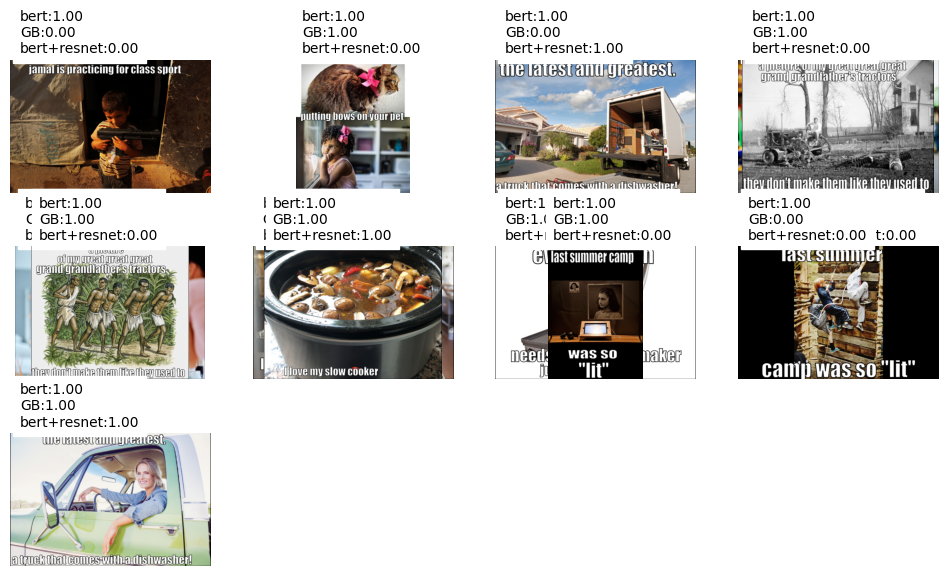

In [75]:
from PIL import Image

# specify the image paths of interest
paths = ['img/30148.png', 'img/78156.png', 
         'img/96180.png', 'img/53027.png',
         'img/02783.png', 'img/75918.png', 
         'img/34528.png', 'img/16842.png',
         'img/07528.png', 'img/32981.png', 
         'img/19730.png', 'img/35719.png',
         'img/26187.png', 'img/18367.png', 
         'img/47016.png', 'img/16704.png']

# select only the relevant rows from the dataframe
subset = df_dev[df_dev['img'].isin(paths)].reset_index(drop=True)

# create a new figure and set the background color to white
fig = plt.figure(figsize=(12, 9))
fig.set_facecolor('white')
fig.subplots_adjust(hspace=0.4, wspace=0.2)

# for each pair of images, plot them and annotate the predictions as a legend
for i in range(0, len(subset), 2):
    # load the images
    img_path1 = f"../../data/{subset.loc[i, 'img']}"
    img1 = Image.open(img_path1)

    img_path2 = f"../../data/{subset.loc[i+1, 'img']}"
    img2 = Image.open(img_path2)

    # add the subplot for the first image
    ax1 = fig.add_subplot(4, 4, i//2+1)
    ax1.imshow(img1)

    # annotate the predictions as a legend for the first image
    pred_str1 = f"bert:{subset.loc[i, 'bert_base_cased_finetuned']:.2f}\nGB:{subset.loc[i, 'GBensemble']:.2f}\nbert+resnet:{subset.loc[i, 'bert+resnet']:.2f}"
    ax1.text(0.05, 1.05, pred_str1, transform=ax1.transAxes, fontsize=10, bbox=dict(facecolor='white', edgecolor='white', pad=5))

    # turn off the axis labels
    ax1.set_axis_off()

    # add the subplot for the second image
    ax2 = fig.add_subplot(4, 4, i//2+2)
    ax2.imshow(img2)

    # annotate the predictions as a legend for the second image
    pred_str2 = f"bert:{subset.loc[i+1, 'bert_base_cased_finetuned']:.2f}\nGB:{subset.loc[i+1, 'GBensemble']:.2f}\nbert+resnet:{subset.loc[i+1, 'bert+resnet']:.2f}"
    ax2.text(0.05, 1.05, pred_str2, transform=ax2.transAxes, fontsize=10, bbox=dict(facecolor='white', edgecolor='white', pad=5))

    # turn off the axis labels
    ax2.set_axis_off()

plt.show()

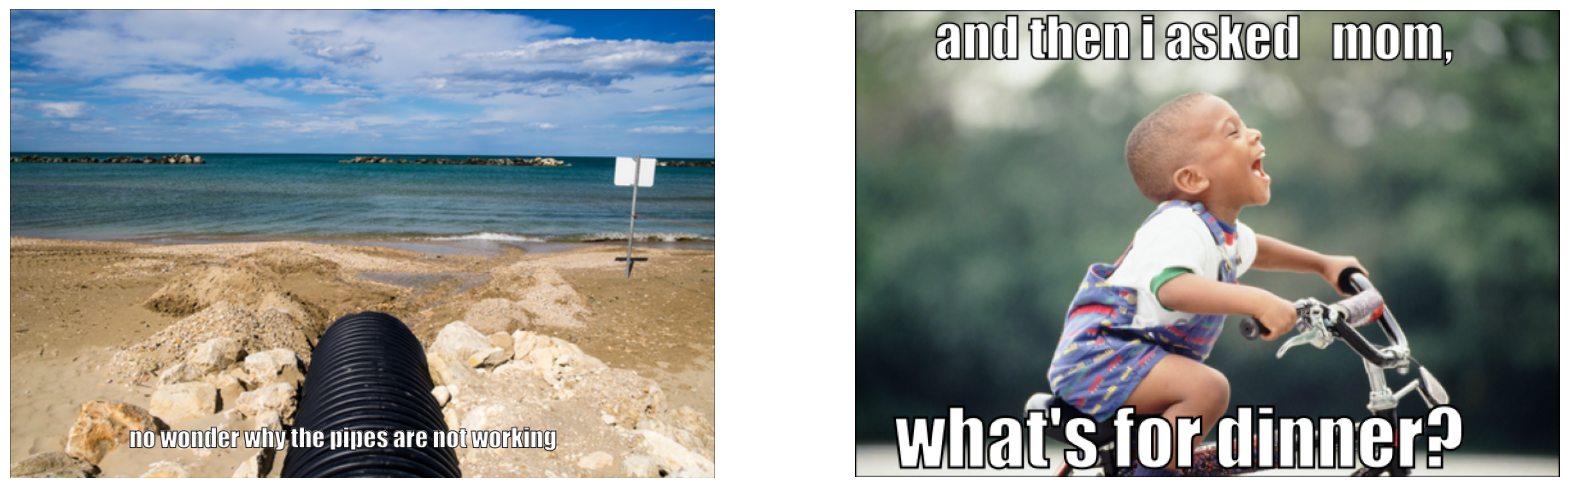

In [67]:
a = plot_images([
       # FPs all models
    # 'img/40395.png',  # bias
    # 'img/13280.png', 'img/91602.png', # down - bias
    # 'img/84107.png', 'img/18367.png',  # sexism -bias
    
    # 'img/78659.png', # doubtful
    
     'img/85761.png',  'img/49650.png',
    
], file_path = '../../data/')


# 'img/13026.png', 'img/19530.png', 'img/92738.png',
# \\\\\\\\\\\\\\\\\\\\

# 'img/75482.png', 'img/53027.png',0685594681

In [68]:
a.savefig('plots/fn_doubtful_all', bbox_inches='tight', pad_inches=0.1, dpi = 300)

In [56]:
# df_dev[df_dev.text == 'jamal is practicing for class sport']
# df_dev[df_dev.text == 'a real man loads the dishwasher every night']
# df_dev[df_dev.text == 'in the muslim world all gay men are well hung']
# df_dev[df_dev.text == 'pretty much sums up islam']
df_dev[df_dev.text == 'the latest and greatest. a truck that comes with a dishwasher!']
# df_dev[df_dev.text == 'I love my slow cooker']
# df_dev[df_dev.text == 'last summer camp was so "lit"']

id            img  label  \
332  32981  img/32981.png      0   
533   7528  img/07528.png      1   

                                                  text  \
332  the latest and greatest. a truck that comes wi...   
533  the latest and greatest. a truck that comes wi...   

                                                tokens  \
332  the latest and greatest . a truck that comes w...   
533  the latest and greatest . a truck that comes w...   

                                                lemmas  \
332  the late and great . a truck that come with a ...   
533  the late and great . a truck that come with a ...   

                                                  upos  \
332  DET ADJ CCONJ ADJ PUNCT DET NOUN PRON VERB ADP...   
533  DET ADJ CCONJ ADJ PUNCT DET NOUN PRON VERB ADP...   

                                            pos_fw_emo  count  \
332  the late and ADJ PUNCT a truck that VERB with ...      2   
533  the late and ADJ PUNCT a truck that VERB with ...      2   

       emotion_associations  ...  hatebert_vectors hatebert_direct  \
332  negative sadness trust  ...                 1               0   
533  negative sadness trust  ...                 1               0   

     bert_base_cased_finetuned  svm_BoW_baseline_linear_C10  \
332                          1                            0   
533                          1                            0   

     baseline_svm_char_kernelC10  Advanced_svm_linear_100K_C10  \
332                            1                             1   
533                            1                             1   

     ResNet_svm_rbf_kernel  ResNet_svm_linear_kernelC10  GBensemble  \
332                      0                            1           0   
533                      0                            0           1   

     bert+resnet  
332          1.0  
533          1.0  

[2 rows x 22 columns]

In [43]:
mask = df_dev['label'] != df_dev['bert_base_cased_finetuned']
mask &= df_dev['label'] == 0
df_dev[mask].img.values

array(['img/56947.png', 'img/68452.png', 'img/75482.png', 'img/52319.png',
       'img/20653.png', 'img/14672.png', 'img/82143.png', 'img/13207.png',
       'img/19607.png', 'img/62093.png', 'img/12684.png', 'img/85790.png',
       'img/74912.png', 'img/58726.png', 'img/40395.png', 'img/02593.png',
       'img/62581.png', 'img/85293.png', 'img/48973.png', 'img/13280.png',
       'img/95806.png', 'img/27054.png', 'img/60724.png', 'img/94170.png',
       'img/42903.png', 'img/30579.png', 'img/82509.png', 'img/03214.png',
       'img/19523.png', 'img/53027.png', 'img/82945.png', 'img/16420.png',
       'img/91602.png', 'img/50841.png', 'img/35719.png', 'img/20984.png',
       'img/68257.png', 'img/53418.png', 'img/32981.png', 'img/38095.png',
       'img/49805.png', 'img/60893.png', 'img/93148.png', 'img/43092.png',
       'img/92068.png', 'img/73021.png', 'img/56149.png', 'img/41796.png',
       'img/41035.png', 'img/68401.png', 'img/75918.png', 'img/98720.png',
       'img/84107.png', '

In [ ]:
# 'img/30148.png', 'img/78156.png' 
# 'img/96180.png', 'img/53027.png'
# 'img/02783.png', 'img/75918.png'
# 'img/34528.png', 'img/16842.png'
# 'img/07528.png', 'img/32981.png'
# 'img/19730.png', 'img/35719.png'
# 'img/26187.png', 'img/18367.png'
# 'img/47016.png', 'img/16704.png'

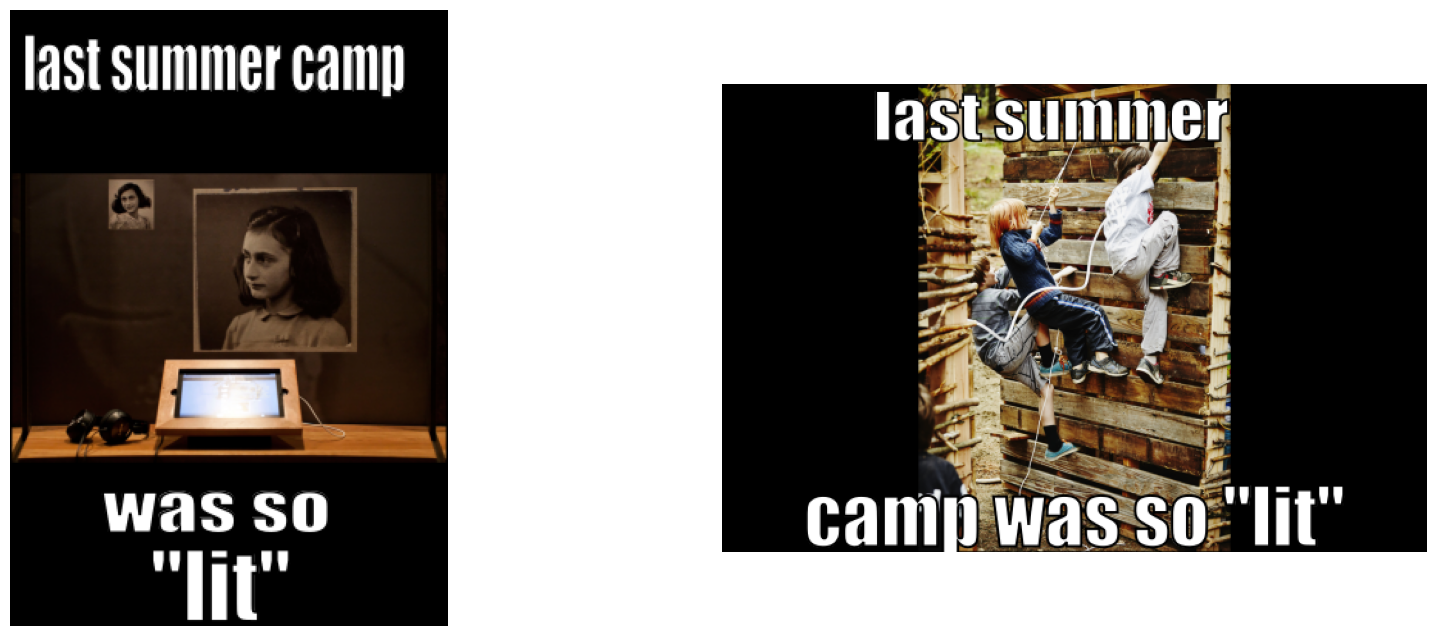

In [104]:
# a = plot_images(food_maker_bert, file_path = '../../data/')
a = plot_images([ 'img/47016.png', 'img/16704.png',], file_path = '../../data/')
# odubtful label 'img/14672.png',

#  'img/18367.png', 'img/16704.png',

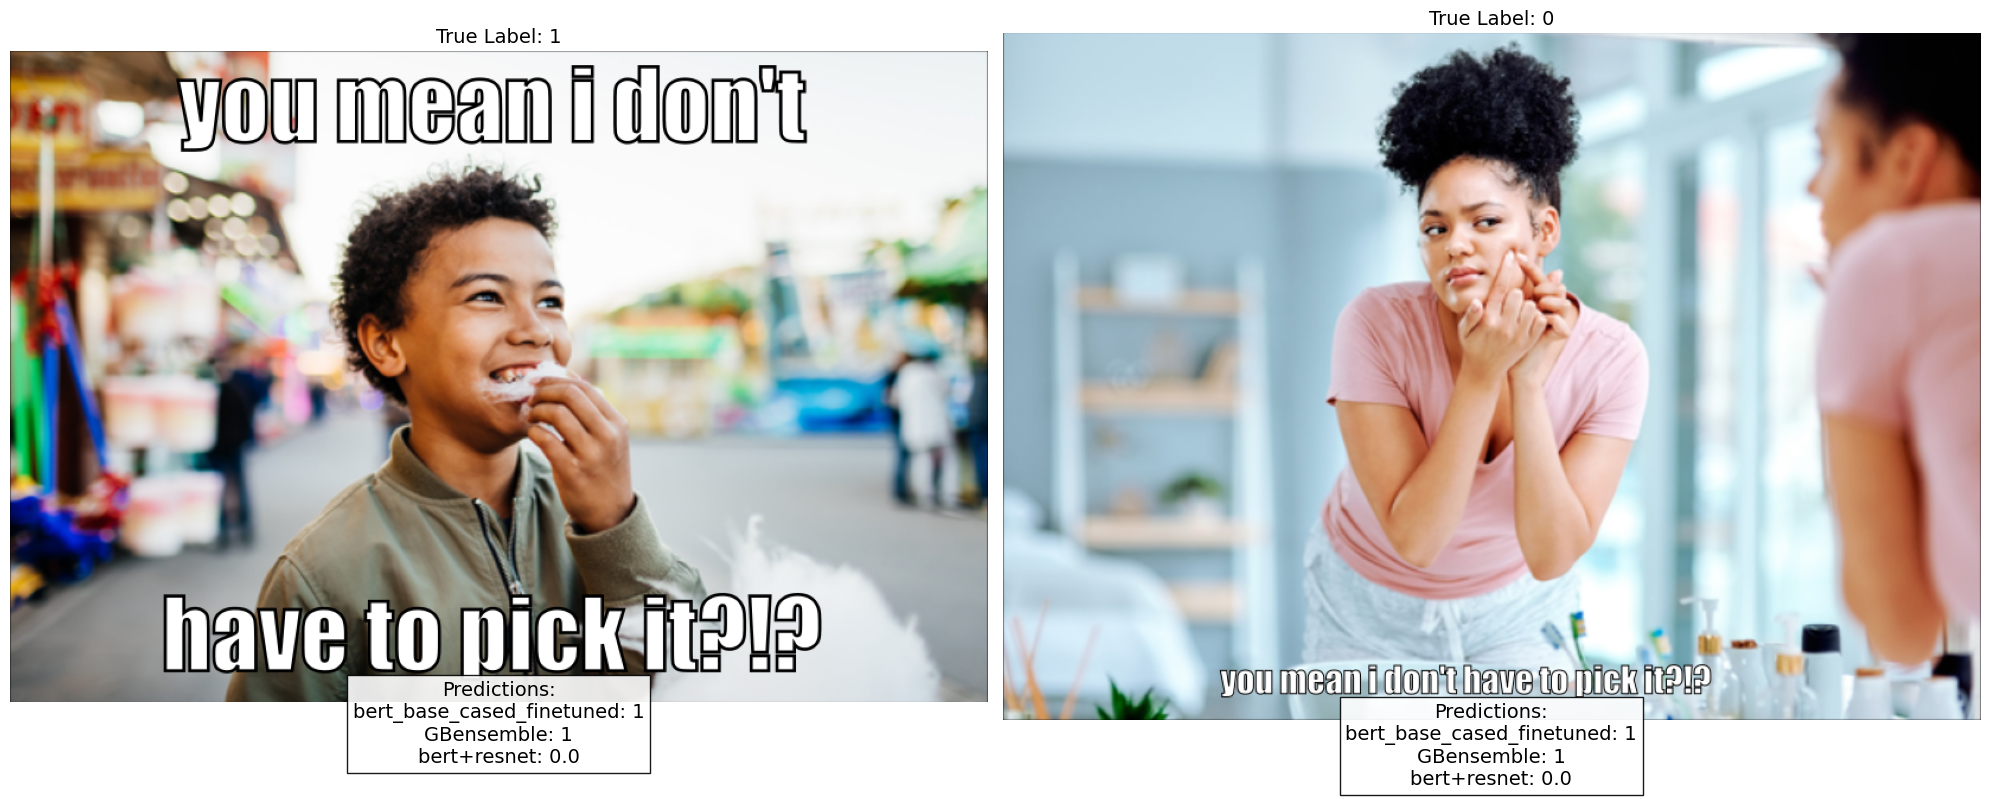

In [26]:
a = plot_diff_images([
    'img/30148.png', 'img/78156.png' ,
    # 'img/96180.png', 'img/53027.png',
    # 'img/02783.png', 'img/75918.png',
    # 'img/26187.png', 'img/18367.png',
##### 'img/34528.png', 'img/16842.png',
# 'img/07528.png', 'img/32981.png', 

# 'img/47016.png', 'img/16704.png',
# 'img/19730.png', 'img/35719.png', 
    ], df_dev
    , file_path = '../../data/')
# dishwaher sandwich maker 'img/40982.png', 'img/12973.png', 'img/68530.png', 'img/02634.png',  'img/93528.png', 'img/29054.png'
# fn with hateful cues 'img/05938.png', 'img/06582.png', 

In [27]:
a.savefig('plots/row14_all', bbox_inches='tight', pad_inches=0.1, dpi = 300)

In [42]:
a.savefig('plots/bert_fn_doubtful_label', bbox_inches='tight', pad_inches=0.1, dpi = 300)

In [ ]:
doubtful labels bert fn = 'img/85761.png','img/49650.png'


In [3]:
pd.options.display.max_colwidth = 100

In [4]:
df_dev.columns

Index(['id', 'img', 'label', 'text', 'tokens', 'lemmas', 'upos', 'pos_fw_emo',
       'count', 'emotion_associations', 'sentiment_score', 'intent',
       'hatebert_vectors', 'hatebert_direct', 'bert_base_cased_finetuned',
       'svm_BoW_baseline_linear_C10', 'baseline_svm_char_kernelC10',
       'Advanced_svm_linear_100K_C10', 'ResNet_svm_rbf_kernel',
       'ResNet_svm_linear_kernelC10', 'GBensemble', 'bert+resnet'],
      dtype='object')

In [5]:
df_dev['bert+resnet'] != df_dev['bert_base_cased_finetuned']

0      False
1      False
2       True
3      False
4      False
       ...  
535    False
536    False
537     True
538    False
539    False
Length: 540, dtype: bool

In [ ]:
# create a boolean index to select rows where not all models agree
mask = df_dev['label'] != df_dev['bert_base_cased_finetuned']
mask &= df_dev['label'] != df_dev['bert+resnet']
mask &= df_dev['label'] != df_dev['ResNet_svm_linear_kernelC10']

mask1 = df_dev['label'] == df_dev['bert_base_cased_finetuned']
mask1 &= df_dev['label'] != df_dev['bert+resnet']
mask1 &= df_dev['label'] != df_dev['ResNet_svm_linear_kernelC10']


mask &= df_dev['label'] != df_dev['ResNet_svm_linear_kernelC10']
mask &= df_dev['label'] != df_dev['ResNet_svm_linear_kernelC10']

# use the boolean index to select the relevant rows
disagreements_all = df_dev[mask]

# perform your quantitative analysis on the disagreements dataframe
# ...
```

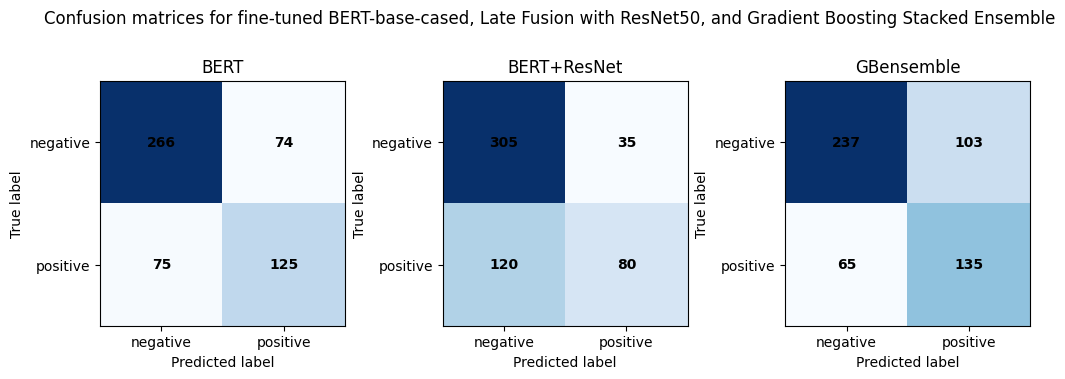

In [5]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
# dictionary to store the confusion matrices
confusion_matrices = {}

# calculate the confusion matrix for bert_base_cased_finetuned
cm_bert = confusion_matrix(df_dev['label'], df_dev['bert_base_cased_finetuned'])
confusion_matrices['bert'] = cm_bert

# calculate the confusion matrix for bert+resnet
df_dev['bert+resnet_combined'] = df_dev['bert_base_cased_finetuned'] & df_dev['ResNet_svm_linear_kernelC10']
cm_bert_resnet = confusion_matrix(df_dev['label'], df_dev['bert+resnet_combined'])
confusion_matrices['bert_resnet'] = cm_bert_resnet

# calculate the confusion matrix for GBensemble
cm_resnet = confusion_matrix(df_dev['label'], df_dev['GBensemble'])
confusion_matrices['GBensemble'] = cm_resnet

# set up the plot
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12,4))
fig.suptitle('Confusion matrices for fine-tuned BERT-base-cased, Late Fusion with ResNet50, and Gradient Boosting Stacked Ensemble')

# plot the confusion matrix for bert_base_cased_finetuned
ax = axes[0]
ax.imshow(cm_bert, cmap='Blues')
ax.set_xticks(np.arange(len(cm_bert)))
ax.set_yticks(np.arange(len(cm_bert)))
ax.set_xticklabels(['negative', 'positive'])
ax.set_yticklabels(['negative', 'positive'])
ax.set_title('BERT')
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
for i in range(len(cm_bert)):
    for j in range(len(cm_bert)):
        ax.text(j, i, format(cm_bert[i, j], 'd'), ha="center", va="center", fontweight="bold")

# plot the confusion matrix for bert+resnet
ax = axes[1]
ax.imshow(cm_bert_resnet, cmap='Blues')
ax.set_xticks(np.arange(len(cm_bert_resnet)))
ax.set_yticks(np.arange(len(cm_bert_resnet)))
ax.set_xticklabels(['negative', 'positive'])
ax.set_yticklabels(['negative', 'positive'])
ax.set_title('BERT+ResNet')
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
for i in range(len(cm_bert_resnet)):
    for j in range(len(cm_bert_resnet)):
        ax.text(j, i, format(cm_bert_resnet[i, j], 'd'), ha="center", va="center", fontweight="bold")

# plot the confusion matrix for GBensemble
ax = axes[2]
ax.imshow(cm_resnet, cmap='Blues')
ax.set_xticks(np.arange(len(cm_resnet)))
ax.set_yticks(np.arange(len(cm_resnet)))
ax.set_xticklabels(['negative', 'positive'])
ax.set_yticklabels(['negative', 'positive'])
ax.set_title('GBensemble')
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
for i in range(len(cm_resnet)):
    for j in range(len(cm_resnet)):
        ax.text(j, i, format(cm_resnet[i, j], 'd'), ha="center", va="center", fontweight="bold")

# adjust spacing between the images
plt.subplots_adjust(wspace=0.4)
plt.savefig('plots/bert-late-fusion-ensemble-matrices', bbox_inches='tight', pad_inches=0.1, dpi = 300)
# show the plot
plt.show()

In [71]:
plt.savefig('plots/bert-late-fusion-matrices', bbox_inches='tight', pad_inches=0.1, dpi = 300)

<Figure size 640x480 with 0 Axes>

In [66]:
bert_perf = model_performance(df_dev, ['bert_base_cased_finetuned', 'bert+resnet', 'ResNet_svm_linear_kernelC10'])


In [67]:
bert_perf

model  f1_score  precision    recall  accuracy  \
0    bert_base_cased_finetuned  0.703885   0.704100  0.703676  0.724074   
2  ResNet_svm_linear_kernelC10  0.604930   0.609676  0.617500  0.612963   
1                  bert+resnet  0.507162   0.545371  0.527500  0.611111   

      AUROC  
0  0.703676  
2  0.617500  
1  0.527500

In [ ]:
df_dev[(df_dev['label'] == df_dev['bert_base_cased_finetuned']) & (df_dev['label'] != df_dev['bert+resnet'])][df_dev.label == 1]

In [61]:
df_dev[(df_dev['label'] == df_dev['ResNet_svm_linear_kernelC10']) & (df_dev['label'] != df_dev['bert+resnet'])]

id            img  label  \
45   89047  img/89047.png      0   
61   12684  img/12684.png      0   
77   85790  img/85790.png      0   
86   74912  img/74912.png      0   
105   2593  img/02593.png      0   
..     ...            ...    ...   
511  27498  img/27498.png      1   
516  93528  img/93528.png      1   
524  29054  img/29054.png      1   
525   6273  img/06273.png      1   
529  34528  img/34528.png      1   

                                                                          text  \
45          my wife called me a paedophile thats a big word for a one year old   
61                                    the original way to pick up black chicks   
77       white boys when they realize that a group of fish is called a school:   
86                         when she finally lets you put it in her gas chamber   
105                                             tell me where's the gay parade   
..                                                                         ...   
511  who's gonna make the sandwiches? what do we do with all these sandwiches?   
516                                   portable dishwasher slash sandwich maker   
524                                                          broken dishwasher   
525                                                            the jihad squad   
529                    every kitchen needs a sandwich maker just like this one   

                                                                            tokens  \
45             my wife called me a paedophile that s a big word for a one year old   
61                                        the original way to pick up black chicks   
77          white boys when they realize that a group of fish is called a school :   
86                             when she finally lets you put it in her gas chamber   
105                                                tell me where 's the gay parade   
..                                                                             ...   
511  who 's gon na make the sandwiches ? what do we do with all these sandwiches ?   
516                                       portable dishwasher slash sandwich maker   
524                                                              broken dishwasher   
525                                                                the jihad squad   
529                        every kitchen needs a sandwich maker just like this one   

                                                                       lemmas  \
45           my wife call I a paedophile that s a big word for a one year old   
61                                    the original way to pick up black chick   
77        white boy when they realize that a group of fish be call a school :   
86                         when she finally let you put it in her gas chamber   
105                                            tell I where be the gay parade   
..                                                                        ...   
511  who be go to make the sandwich ? what do we do with all these sandwich ?   
516                                  portable dishwasher slash sandwich maker   
524                                                          break dishwasher   
525                                                           the jihad squad   
529                    every kitchen need a sandwich maker just like this one   

                                                                                 upos  \
45           PRON NOUN VERB PRON DET NOUN PRON VERB DET ADJ NOUN ADP DET NUM NOUN ADJ   
61                                                DET ADJ NOUN PART VERB ADP ADJ NOUN   
77           ADJ NOUN SCONJ PRON VERB SCONJ DET NOUN ADP NOUN AUX VERB DET NOUN PUNCT   
86                              SCONJ PRON ADV VERB PRON VERB PRON ADP PRON NOUN NOUN   
105                                                 VERB PRON SCONJ AUX DET NOUN NOUN   
..                                                

In [29]:
fn

id            img  label  \
140   8291  img/08291.png      1   
141  46971  img/46971.png      1   
142   3745  img/03745.png      1   
143  83745  img/83745.png      1   
144  80243  img/80243.png      1   
..     ...            ...    ...   
489  67103  img/67103.png      1   
502  91763  img/91763.png      1   
511  27498  img/27498.png      1   
526  25061  img/25061.png      1   
529  34528  img/34528.png      1   

                                                                                               text  \
140                                                           white people is this a shooting range   
141                                                                           bravery at its finest   
142         your order comes to $37.50 and your white privilege discount brings the total to $37.50   
143                                         it is time.. to send these parasites back to the desert   
144                                                                          mississippi wind chime   
..                                                                                              ...   
489                                                                       still better than mexican   
502  imagine being so disgusting there have to be laws to try to stop normal people from hating you   
511                       who's gonna make the sandwiches? what do we do with all these sandwiches?   
526                                           this is el paso shooter's father. every. single. time   
529                                         every kitchen needs a sandwich maker just like this one   

                                                                                             tokens  \
140                                                           white people is this a shooting range   
141                                                                           bravery at its finest   
142       your order comes to $ 37.50 and your white privilege discount brings the total to $ 37.50   
143                                        it is time .. to send these parasites back to the desert   
144                                                                          mississippi wind chime   
..                                                                                              ...   
489                                                                       still better than mexican   
502  imagine being so disgusting there have to be laws to try to stop normal people from hating you   
511                   who 's gon na make the sandwiches ? what do we do with all these sandwiches ?   
526                                       this is el paso shooter 's father . every . single . time   
529                                         every kitchen needs a sandwich maker just like this one   

                                                                                       lemmas  \
140                                                     white people be this a shooting range   
141                                                                       bravery at its fine   
142   your order come to $ 37.50 and your white privilege discount bring the total to $ 37.50   
143                                   it be time .. to send these parasite back to the desert   
144                                                                    mississippi wind chime   
..                                                                                        ...   
489                                                                   still well than mexican   
502  imagine be so disgusting there have to be law to try to stop normal people from hate you   
511                  who be go to make the sandwich ? what do we do with all these sandwich ?   
526                                 this be el paso shooter 's father . every . single . time   
529                               

In [73]:
fp = df_dev[(df_dev['label'] == df_dev['bert_base_cased_finetuned']) & (df_dev['label'] != df_dev['bert+resnet'])][df_dev.label == 0]

C:\Users\Hisha\AppData\Local\Temp\ipykernel_25136\2071581115.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fp = df_dev[(df_dev['label'] == df_dev['bert_base_cased_finetuned']) & (df_dev['label'] != df_dev['bert+resnet'])][df_dev.label == 0]


In [40]:
fn.img.values

array(['img/08291.png', 'img/46971.png', 'img/03745.png', 'img/83745.png',
       'img/80243.png', 'img/05279.png', 'img/01796.png', 'img/31752.png',
       'img/27635.png', 'img/80597.png', 'img/45368.png', 'img/25149.png',
       'img/89071.png', 'img/49826.png', 'img/02568.png', 'img/24316.png',
       'img/65342.png', 'img/54069.png', 'img/95640.png', 'img/65832.png',
       'img/43275.png', 'img/02478.png', 'img/65403.png', 'img/29750.png',
       'img/02143.png', 'img/13026.png', 'img/18945.png', 'img/39607.png',
       'img/29437.png', 'img/17682.png', 'img/84510.png', 'img/95830.png',
       'img/29873.png', 'img/48370.png', 'img/39578.png', 'img/17028.png',
       'img/61872.png', 'img/19730.png', 'img/05126.png', 'img/87169.png',
       'img/92738.png', 'img/68459.png', 'img/01456.png', 'img/96180.png',
       'img/98701.png', 'img/31208.png', 'img/34687.png', 'img/39827.png',
       'img/54780.png', 'img/71620.png', 'img/91756.png', 'img/47162.png',
       'img/07135.png', '

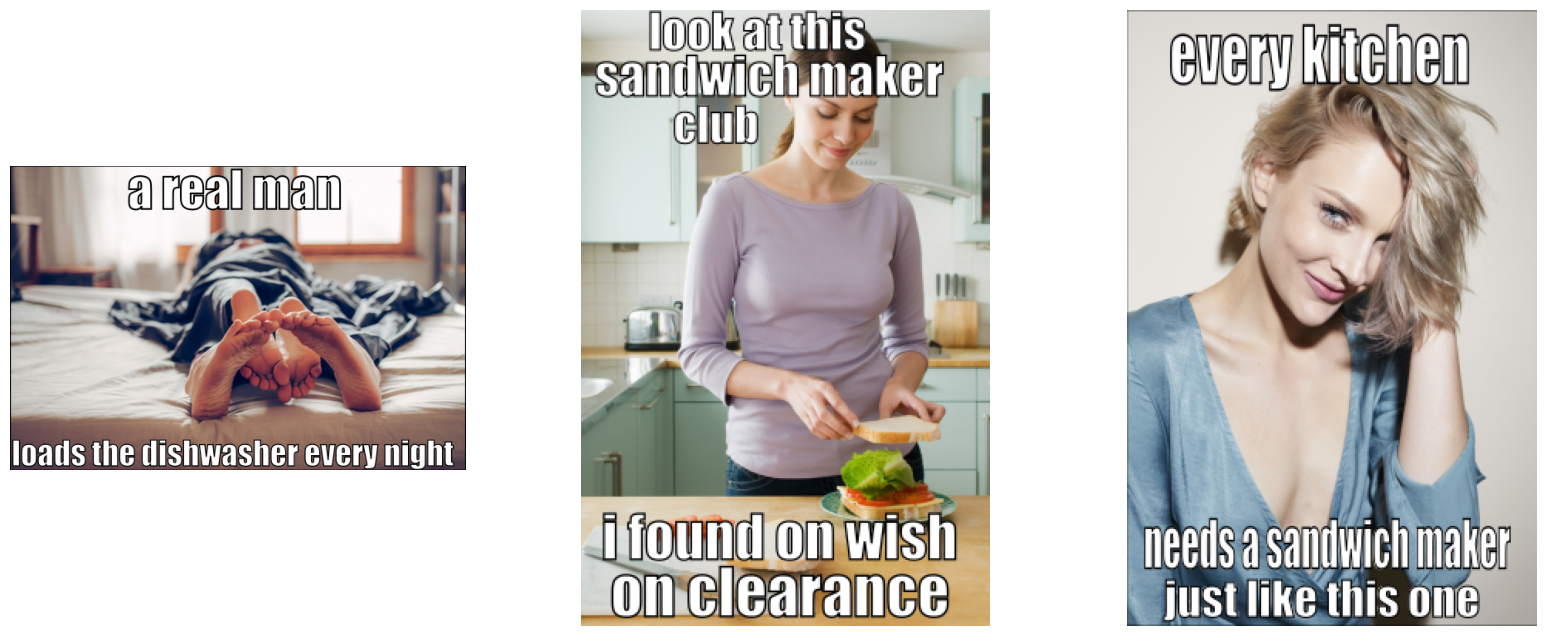

In [167]:
 
a = plot_images([ 
    # 'img/01796.png', 'img/95640.png',  'img/48370.png', # islam
        # 'img/25149.png', 'img/05279.png', 'img/87169.png',
    # 'img/24316.png', 'img/92738.png', 'img/98701.png', # black
        'img/01726.png', 'img/75286.png', 'img/34528.png', # women
    
                 
              
            
                 
                 
       ], file_path = '../../data/')    
# plot_images(['i
# mg/18945.png', 'img/39607.png',], file_path = '../../data/')

In [168]:
a.savefig('plots/fn_women_bertfused', bbox_inches='tight', pad_inches=0.1, dpi = 300)

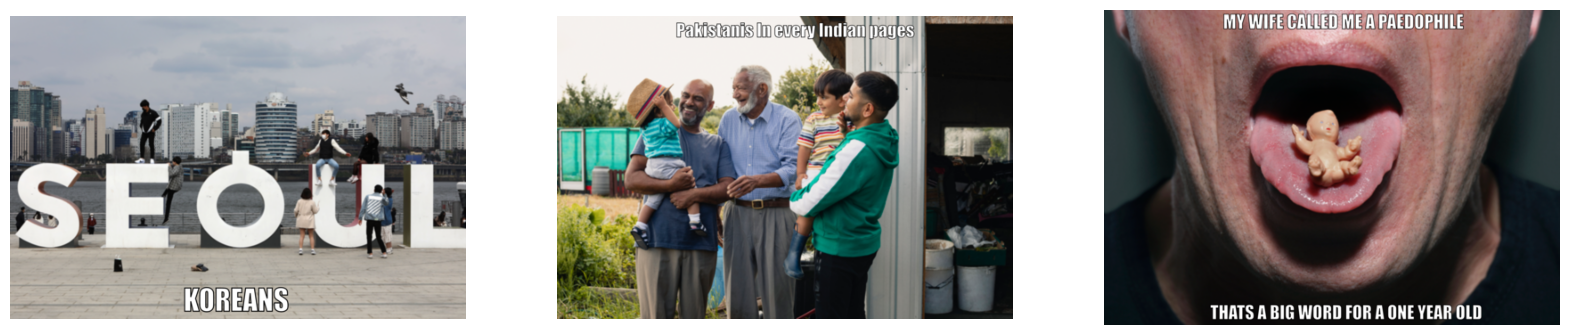

In [30]:
['img/41328.png', 'img/61048.png', 'img/89047.png', 
 'img/05618.png', 'img/62504.png', 'img/64510.png',
 'img/87251.png', 'img/35470.png', 'img/01967.png', 
 'img/52104.png', 'img/07351.png', 'img/75142.png',
 'img/97132.png', 'img/32049.png', 'img/51807.png', 
 'img/47950.png', 'img/67082.png']
a = plot_images(['img/41328.png', 'img/61048.png', 'img/89047.png'], file_path = '../../data/')

In [ ]:
fp = ['img/89047.png', 'img/62504.png', 'img/87251.png', 'img/01967.png', 'img/75142.png', 'img/07351.png',] #
fn = ['img/31752.png','img/01796.png',]
fn = ['img/27635.png', 'img/80597.png','img/25149.png','img/89071.png', 'img/49826.png','img/02568.png', 'img/24316.png','img/95640.png','img/29750.png',]
#  = ['img/43275.png', ]
#  = []
#  = []
    

In [ ]:
df, fn, tp, tn = error_analysis(df_dev, 'bert_base_cased_finetuned')

In [98]:
tp_black_bert = ['img/30148.png', 'img/96180.png', 'img/02783.png']
food_maker_bert = [ 'img/34528.png', 'img/07528.png','img/26187.png' ]
racism_bert = ['img/19730.png', 'img/07198.png','img/68459.png','img/47016.png']
racism_appendix = ['img/07135.png', 'img/05126.png', 'img/96180.png', ]
foodmaker_appendix = ['img/35840.png','img/54780.png','img/71620.png']

In [108]:
def plot_images(image_paths, file_path = ''):
    """
    Function to plot multiple images given a list of image paths.

    Parameters:
        image_paths (list of strings): List of paths to image files.

    Returns:
        None

    Output:
        Displays a plot of the images.
    """
    # Set up the subplot grid
    n_cols = min(3, len(image_paths))
    n_rows = (len(image_paths) - 1) // n_cols + 1
    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, 8))

    # Check if axes is one-dimensional and reshape if necessary
    if n_rows == 1:
        axes = axes.reshape(1, -1)

    # Plot each image
    for i, path in enumerate(image_paths):
        ax = axes[i // n_cols, i % n_cols]
        img = plt.imread(file_path+path)
        ax.imshow(img)
        ax.axis('off')
        # ax.set_title(path)

    # Show the plot
    plt.show()
    return fig

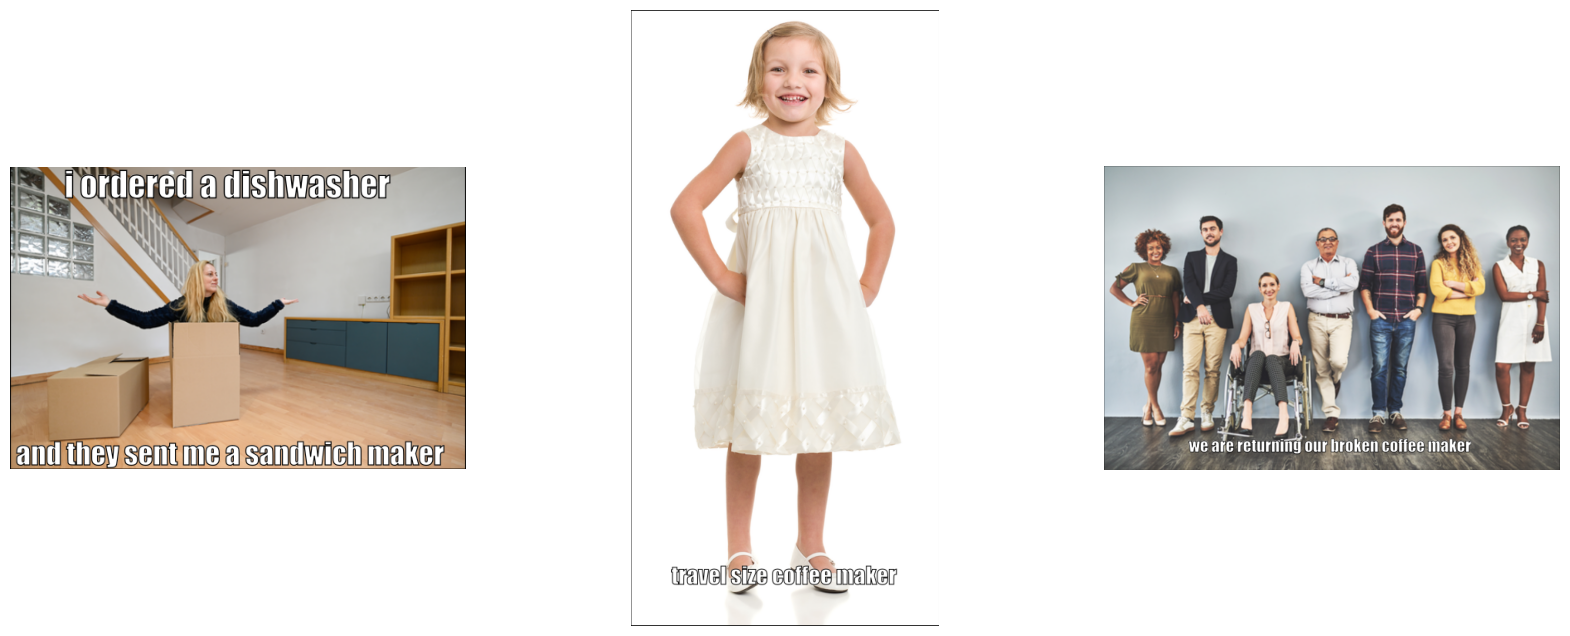

In [111]:
a = plot_images(foodmaker_appendix, datafolder)


In [112]:
a.savefig('plots/true_positives_foodmaker_appendix', bbox_inches='tight', pad_inches=0.1, dpi = 300)

In [397]:
# The following are false positives that are not hateful but were classified hateful. Most of them were seen hateful due to the text or the image being hateful.
false_positives_text_hateful = ['../../data/img/81926.png', '../../data/img/28916.png', '../../data/img/67281.png', '../../data/img/50714.png', '../../data/img/59781.png']

false_positives_img_hateful = ['../../data/img/76012.png', '../../data/img/06827.png', '../../data/img/98541.png' ]

false_positives_gold_label_wrong = ['../../data/img/65307.png', '../../data/img/94651.png', '../../data/img/10756.png']

false_negatives_gold_label_wrong = ['../../data/img/36927.png', '../../data/img/20314.png', '../../data/img/32795.png']

false_negatives_hateful_combo = ['../../data/img/20198.png', '../../data/img/01762.png', '../../data/img/71983.png']

false_negative_implicit = ['../../data/img/27096.png', '../../data/img/42867.png', '../../data/img/73129.png', '../../data/img/80634.png']

In [368]:
ambigious = ['../../data/img/62974.png', # fp
             '../../data/img/81605.png', # fp
            
            ]

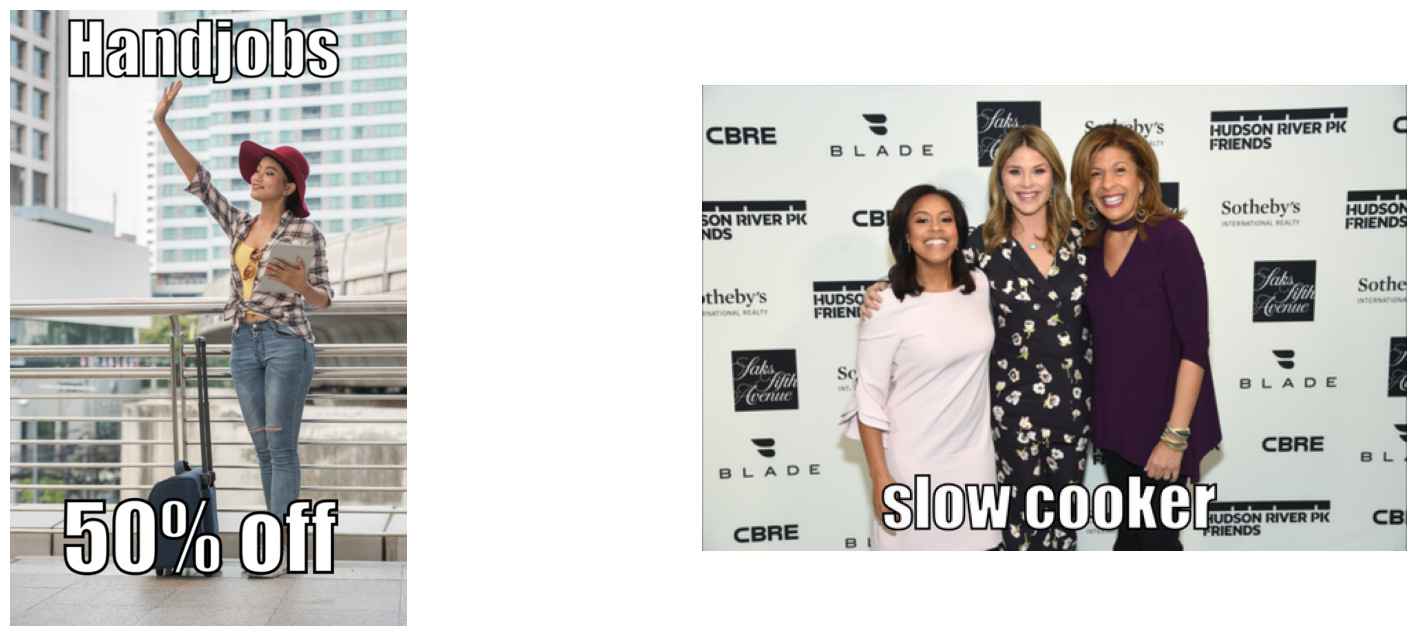

In [400]:
a = plot_images(ambigious)

In [399]:
a.savefig('plots/false_negatives_implicit_hate', bbox_inches='tight', pad_inches=0.1, dpi = 300)

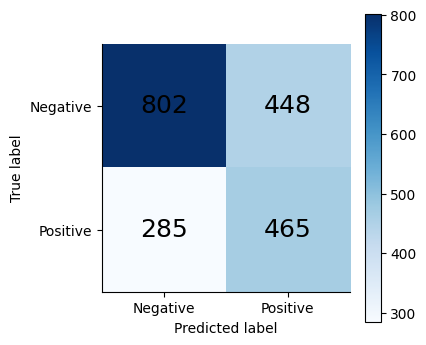

In [265]:
plot_confusion_matrix(df_test, 'label', 'GBensemble', 'test_unseen_confusion_matrix.png')

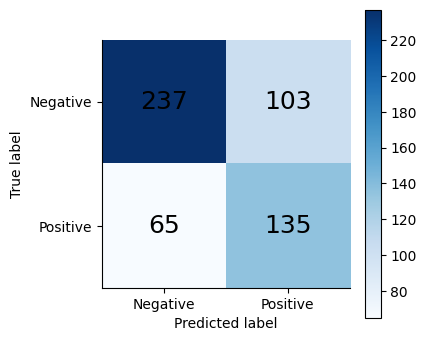

In [266]:
plot_confusion_matrix(df_dev, 'label', 'GBensemble',  'dev_unseen_confusion_matrix.png')

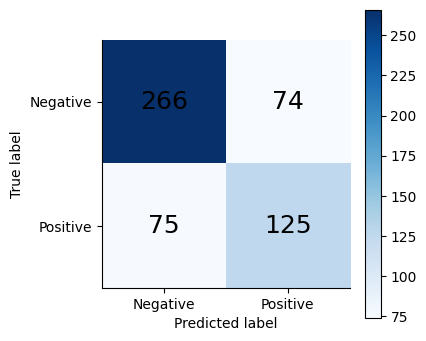

In [6]:
plot_confusion_matrix(df_dev, 'label', 'bert_base_cased_finetuned',  'dev_unseen_bert_confusion_matrix.png')